# Q1. What is the mathematical formula for a linear SVM?

Given a set of training data points (xi) with corresponding labels (yi), where xi is the feature vector and yi is the class label (+1 or -1), the formula for a linear SVM is typically represented as:

f(x) = sign(w * x + b)

Here:

f(x) is the decision function that predicts the class label (+1 or -1) for a new input vector x.
w is the weight vector.
b is the bias term.
denotes the dot product between the weight vector and the input vector.

# Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM aims to find the hyperplane that maximizes the margin between two classes while minimizing the classification error. Mathematically, the objective function can be formulated as:

Minimize: (1/2) * ||w||^2 + C * Σ(max(0, 1 - yi * (w * xi + b)))

Here:

||w||^2 represents the squared Euclidean norm of the weight vector w.
C is the regularization parameter that balances the trade-off between maximizing the margin and minimizing the classification error.
The term Σ(max(0, 1 - yi * (w * xi + b))) computes the hinge loss for each training example, penalizing misclassified points. If a point is correctly classified with a margin of at least 1, the loss is 0.

# Q3. What is the kernel trick in SVM?

The kernel trick in SVM is a technique that allows SVMs to implicitly work in higher-dimensional spaces without explicitly calculating the coordinates of data points in that space. It's used to transform non-linearly separable data into a higher-dimensional space where they might become linearly separable.

One common kernel is the Radial Basis Function (RBF) kernel, which is often used for non-linear classification problems:

K(x, xi) = exp(-γ * ||x - xi||^2)

Here, x and xi are data points, and γ is a parameter that determines the "spread" of the kernel function.

# Q4. What is the role of support vectors in SVM Explain with example

Support vectors are the data points that lie closest to the decision boundary (hyperplane) of an SVM. These points play a critical role in defining the margin and the decision boundary itself. In other words, they are the points that have the potential to affect the placement of the hyperplane.

Example: Imagine a 2D scatter plot with two classes (+1 and -1). The support vectors are the points that are located on or near the margins or the incorrect side of the margin. They determine the position of the margin and, subsequently, the classification boundary.

# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Hyperplane: In a 2D dataset, a hyperplane is a straight line that separates two classes. In higher dimensions, it becomes a hyperplane. For example, in a 2D space, the equation of a hyperplane is w * x + b = 0.

Marginal Plane: The marginal planes are parallel planes that run alongside the hyperplane and just touch the support vectors. They are defined by the equations w * x + b = 1 and w * x + b = -1.

Hard Margin SVM: In a hard margin SVM, the goal is to find a hyperplane that perfectly separates the two classes without any misclassifications. This is suitable when the data is linearly separable.

Soft Margin SVM: In a soft margin SVM, some misclassifications are allowed to achieve a balance between maximizing the margin and minimizing errors. This is used when the data might have some overlap or noise.

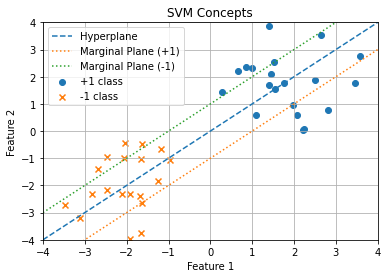

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
class_1 = np.random.randn(20, 2) + [2, 2]
class_2 = np.random.randn(20, 2) - [2, 2]

# Create a scatter plot of the data
plt.scatter(class_1[:, 0], class_1[:, 1], marker='o', label='+1 class')
plt.scatter(class_2[:, 0], class_2[:, 1], marker='x', label='-1 class')

# Hyperplane equation: w * x + b = 0
w = np.array([1, -1])  # Example weight vector
b = 0                   # Example bias term
x_hyperplane = np.linspace(-4, 4, 100)
y_hyperplane = -(w[0] * x_hyperplane + b) / w[1]
plt.plot(x_hyperplane, y_hyperplane, label='Hyperplane', linestyle='--')

# Marginal planes: w * x + b = 1 and w * x + b = -1
y_margin_1 = -(w[0] * x_hyperplane + b - 1) / w[1]
y_margin_2 = -(w[0] * x_hyperplane + b + 1) / w[1]
plt.plot(x_hyperplane, y_margin_1, label='Marginal Plane (+1)', linestyle=':')
plt.plot(x_hyperplane, y_margin_2, label='Marginal Plane (-1)', linestyle=':')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Concepts')
plt.legend()
plt.grid(True)
plt.show()


# Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy for C = 0.01: 0.40


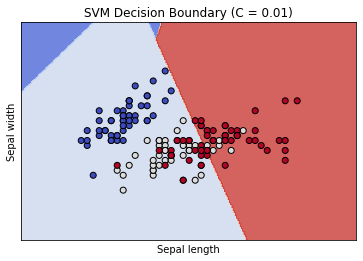

Accuracy for C = 0.1: 0.82


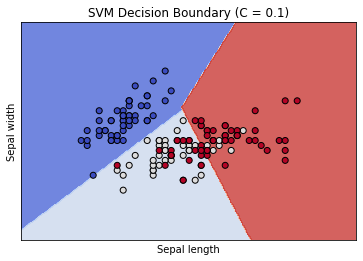

Accuracy for C = 1: 0.80


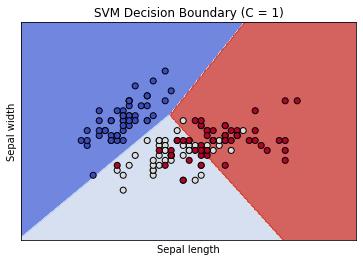

Accuracy for C = 10: 0.80


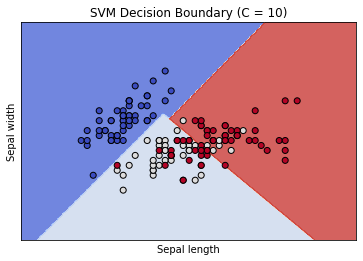

Accuracy for C = 100: 0.80


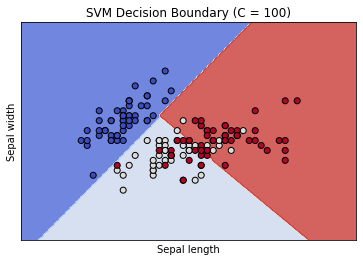

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
C_values = [0.01, 0.1, 1, 10, 100]  # Different values of regularization parameter C
for C in C_values:
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(X_train, y_train)

    # Predict the labels for the testing set
    y_pred = svm_classifier.predict(X_test)

    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for C = {C}: {accuracy:.2f}")

    # Plot decision boundaries using two features
    plt.figure()
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM Decision Boundary (C = {C})")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


# Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Custom Linear SVM Classifier
class CustomLinearSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.weights) - self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * 1 / self.num_epochs * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1 / self.num_epochs * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)

# Train custom Linear SVM classifier
custom_svm_classifier = CustomLinearSVM(learning_rate=0.01, num_epochs=1000)
custom_svm_classifier.fit(X_train, y_train)
y_pred_custom = custom_svm_classifier.predict(X_test)

# Train scikit-learn Linear SVM classifier
sklearn_svm_classifier = SVC(kernel='linear')
sklearn_svm_classifier.fit(X_train, y_train)
y_pred_sklearn = sklearn_svm_classifier.predict(X_test)

# Compare performance
accuracy_custom = accuracy_score(y_test, y_pred_custom)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Custom SVM Accuracy: {accuracy_custom:.2f}")
print(f"scikit-learn SVM Accuracy: {accuracy_sklearn:.2f}")


Custom SVM Accuracy: 0.29
scikit-learn SVM Accuracy: 0.80
